In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../Get_Data_BTC/BTC_Daily_ohlc.csv')

In [28]:
def draw_list_creation(time_step = 5, forecast_threshold = 5) :
    list_of_draw_low = []
    list_of_draw_high = []
    list_of_interval = []
    previous_low = (np.argmin(df['low'].values[0:time_step]) ,min(df['low'].values[0:time_step]))
    previous_high = (np.argmax(df['high'].values[0:time_step]) ,max(df['high'].values[0:time_step]))

    for i in range(time_step, len(df["date"]) -1 - time_step, time_step) :
        # print(i)
        low = (np.argmin(df['low'].values[i:i+time_step]) + i ,min(df['low'].values[i:i+time_step]))
        high = (np.argmax(df['high'].values[i:i+time_step]) + i ,max(df['high'].values[i:i+time_step]))
        interval = (i - time_step, i + time_step + forecast_threshold)
        list_of_interval.append(interval)
        list_of_draw_low.append((previous_low, low))
        list_of_draw_high.append((previous_high, high))
        previous_low = low
        previous_high = high
    
    return list_of_draw_low, list_of_draw_high, list_of_interval



In [44]:
def candleplot(df, list_of_draw_low, list_of_draw_high, list_of_interval,  x_min = 0, x_max = len(df) , filename = "plot_BTC"):
    ## Figure params
    plt.figure(dpi = 200)
    plt.ylabel('price (dollars)')
    plt.title('Bitcoin')
    plt.xlabel('days')
    plt.grid(True)

    ## Import ohlc 
    opens = df['open'].values[x_min:x_max]
    truth = df['close'].values[x_min:x_max]
    highs = df['high'].values[x_min:x_max]
    lows = df['low'].values[x_min:x_max]

    ## Draw candles
    height = truth - opens
    bottom = np.where(height > 0, opens, truth + abs(height))
    color = np.where(height > 0, 'g', 'r')
    plt.bar(range(x_min,len(truth) + x_min), height, bottom=bottom, color=color, align='center')
    plt.vlines(range(x_min, x_min + len(highs)), ymin=lows, ymax=highs, color=color, linewidth=1)


    for i,elt in enumerate(list_of_interval) :
        if elt[0] == x_min :
            index = i 
            break
        elif elt[0] > x_min :
            index = i - 1
            break

    for elt in list_of_draw_low[index:index + 1] :
        x1 = elt[0][0]
        y1 = elt[0][1]
        x2 = elt[1][0]
        y2 = elt[1][1]
        
        plt.plot([x1,x2],[y1,y2], linewidth=1)

    for elt in list_of_draw_high[index:index + 1] :
        x1 = elt[0][0]
        y1 = elt[0][1]
        x2 = elt[1][0]
        y2 = elt[1][1]
        plt.plot([x1,x2],[y1,y2], linewidth=1)      


    plt.savefig(f'./plot/{filename}')

            

In [29]:
list_of_draw_low_5, list_of_draw_high_5, list_of_interval_5 = draw_list_creation(time_step=5, forecast_threshold=5)

print(list_of_interval_5)
print(list_of_draw_low_5)
print(list_of_draw_high_5)

[(0, 15), (5, 20), (10, 25), (15, 30), (20, 35), (25, 40), (30, 45), (35, 50), (40, 55), (45, 60), (50, 65), (55, 70), (60, 75), (65, 80), (70, 85), (75, 90), (80, 95), (85, 100), (90, 105), (95, 110), (100, 115), (105, 120), (110, 125), (115, 130), (120, 135), (125, 140), (130, 145), (135, 150), (140, 155), (145, 160), (150, 165), (155, 170), (160, 175), (165, 180), (170, 185), (175, 190), (180, 195), (185, 200), (190, 205), (195, 210), (200, 215), (205, 220), (210, 225), (215, 230), (220, 235), (225, 240), (230, 245), (235, 250), (240, 255), (245, 260), (250, 265), (255, 270), (260, 275), (265, 280), (270, 285), (275, 290), (280, 295), (285, 300), (290, 305), (295, 310), (300, 315), (305, 320), (310, 325), (315, 330), (320, 335), (325, 340), (330, 345), (335, 350), (340, 355), (345, 360), (350, 365), (355, 370), (360, 375), (365, 380), (370, 385), (375, 390), (380, 395), (385, 400), (390, 405), (395, 410), (400, 415), (405, 420), (410, 425), (415, 430), (420, 435), (425, 440), (430, 

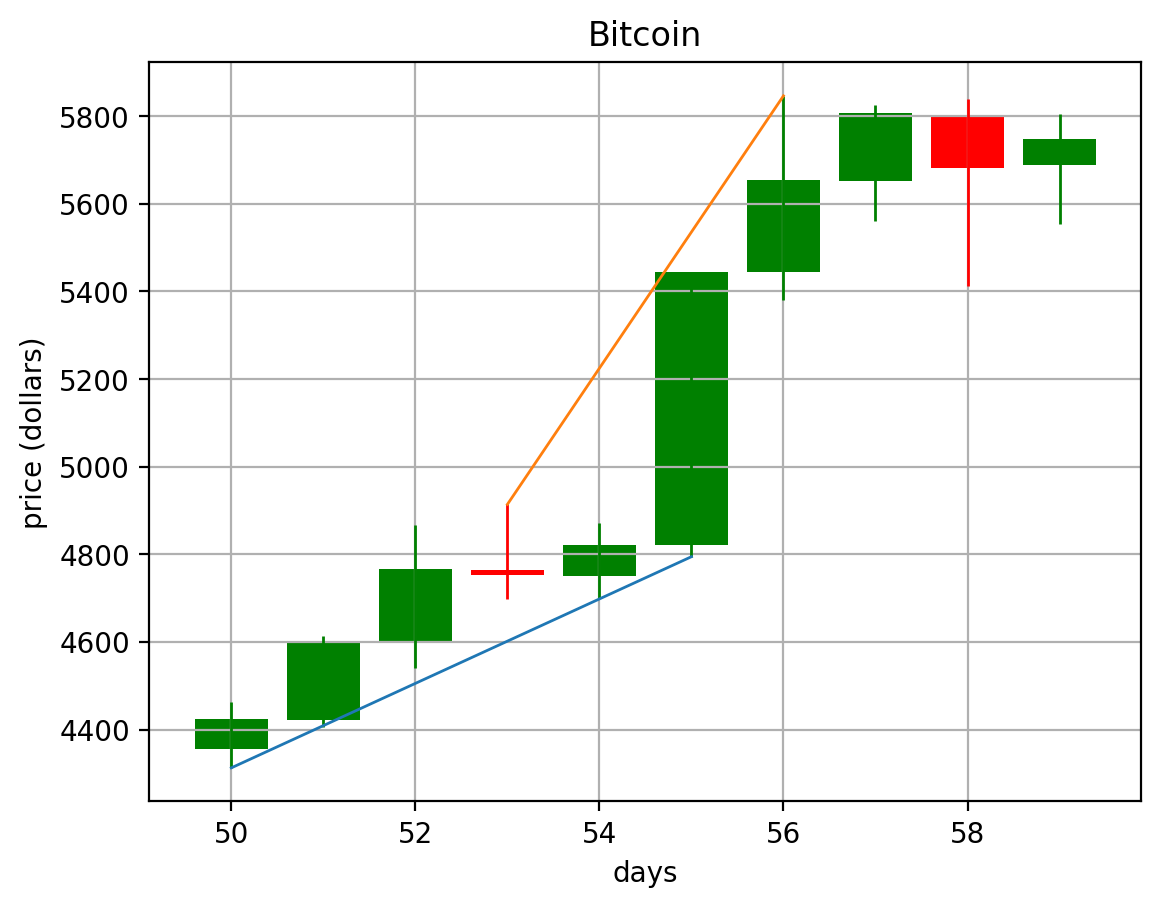

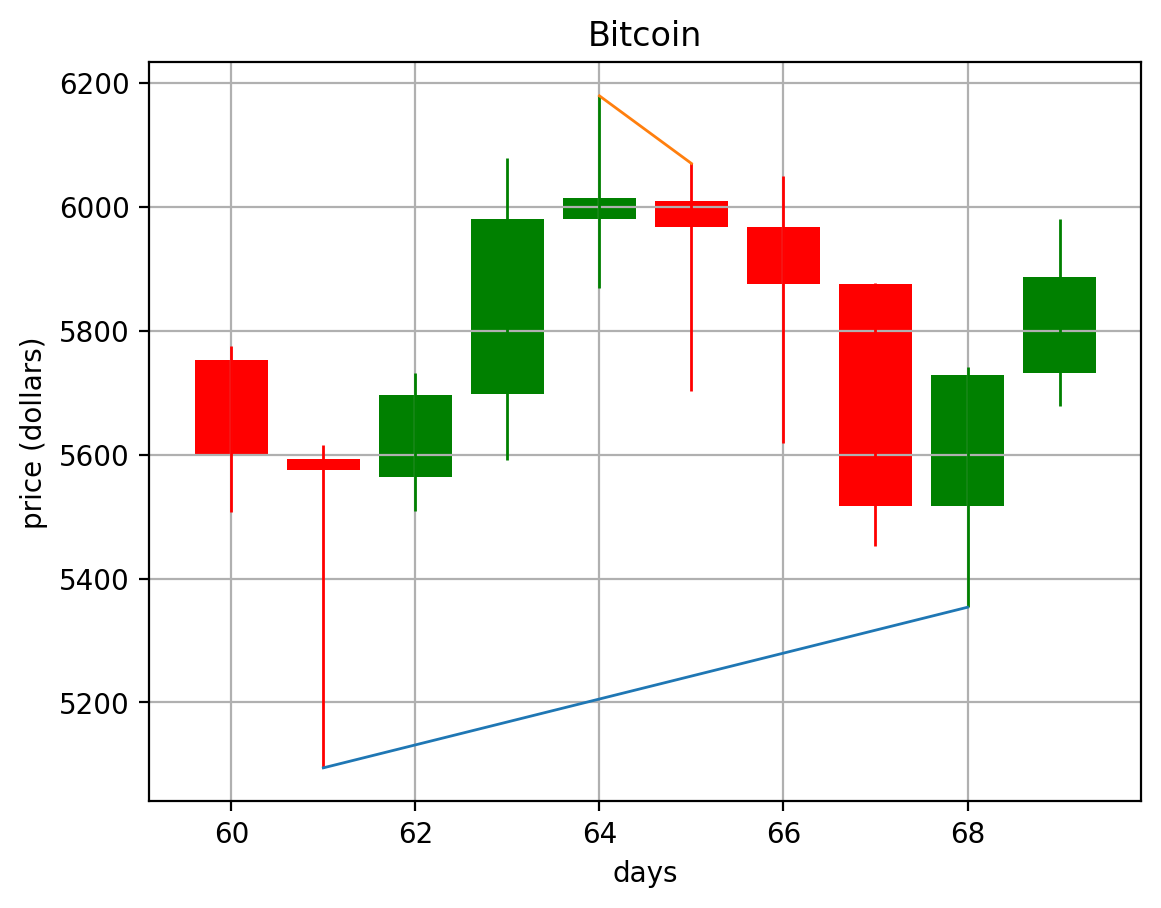

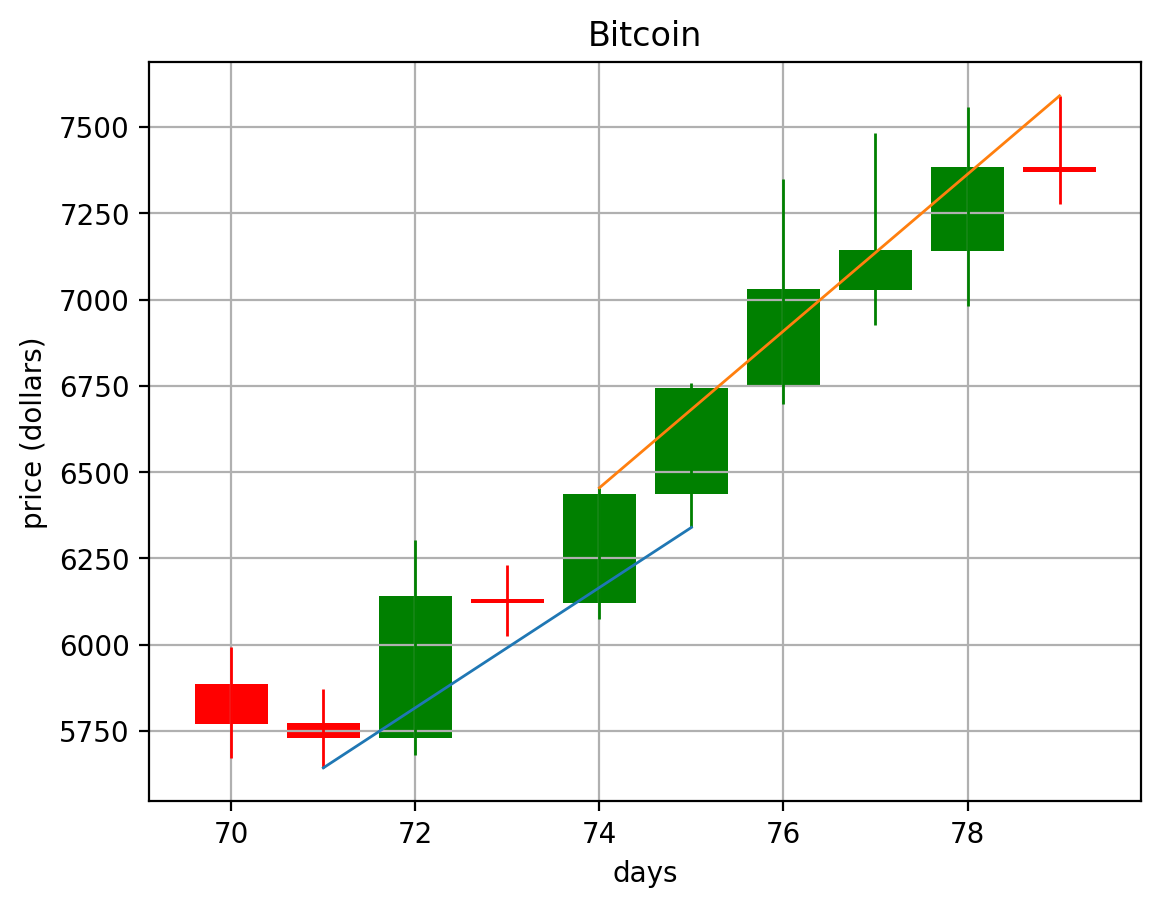

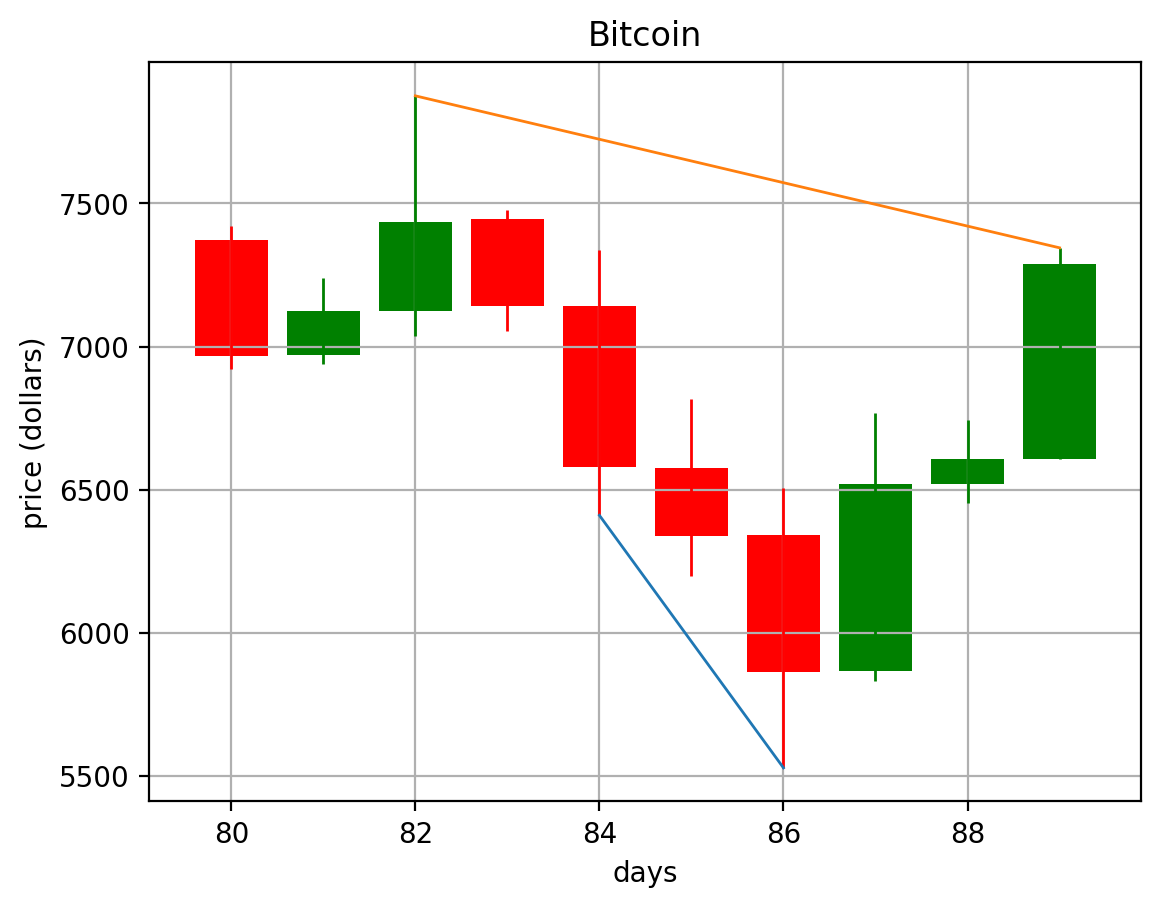

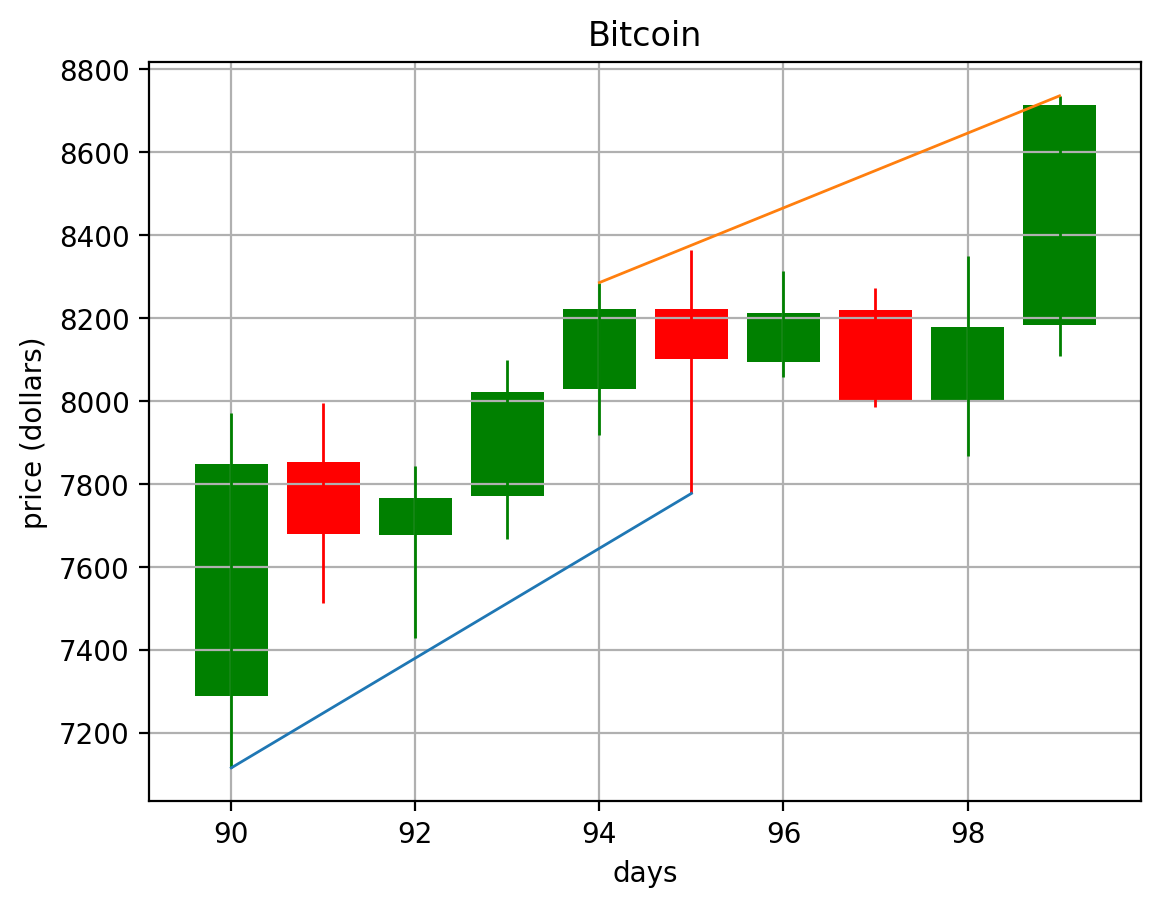

In [45]:
candleplot(df, list_of_draw_low_5, list_of_draw_high_5, list_of_interval_5, x_min = 50 , x_max = 60, filename= "test_50-60-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 60 , x_max = 70, filename= "test_60-70-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 70 , x_max = 80, filename= "test_70-80-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 80 , x_max = 90, filename= "test_80-90-0")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 90 , x_max = 100, filename= "test_90-100-0")

In [30]:
list_of_draw_low_20, list_of_draw_high_20, list_of_interval_20 = draw_list_creation(time_step=20, forecast_threshold=0)

print(list_of_interval_20)
print(list_of_draw_low_20)
print(list_of_draw_high_20)

[(0, 50), (20, 70), (40, 90), (60, 110), (80, 130), (100, 150), (120, 170), (140, 190), (160, 210), (180, 230), (200, 250), (220, 270), (240, 290), (260, 310), (280, 330), (300, 350), (320, 370), (340, 390), (360, 410), (380, 430), (400, 450), (420, 470), (440, 490), (460, 510), (480, 530), (500, 550), (520, 570), (540, 590), (560, 610), (580, 630), (600, 650), (620, 670), (640, 690), (660, 710), (680, 730), (700, 750), (720, 770), (740, 790), (760, 810), (780, 830), (800, 850), (820, 870), (840, 890), (860, 910), (880, 930), (900, 950), (920, 970), (940, 990), (960, 1010), (980, 1030), (1000, 1050), (1020, 1070), (1040, 1090), (1060, 1110), (1080, 1130), (1100, 1150), (1120, 1170), (1140, 1190), (1160, 1210), (1180, 1230), (1200, 1250), (1220, 1270), (1240, 1290), (1260, 1310), (1280, 1330), (1300, 1350), (1320, 1370), (1340, 1390), (1360, 1410), (1380, 1430), (1400, 1450), (1420, 1470), (1440, 1490), (1460, 1510), (1480, 1530), (1500, 1550), (1520, 1570), (1540, 1590), (1560, 1610), 

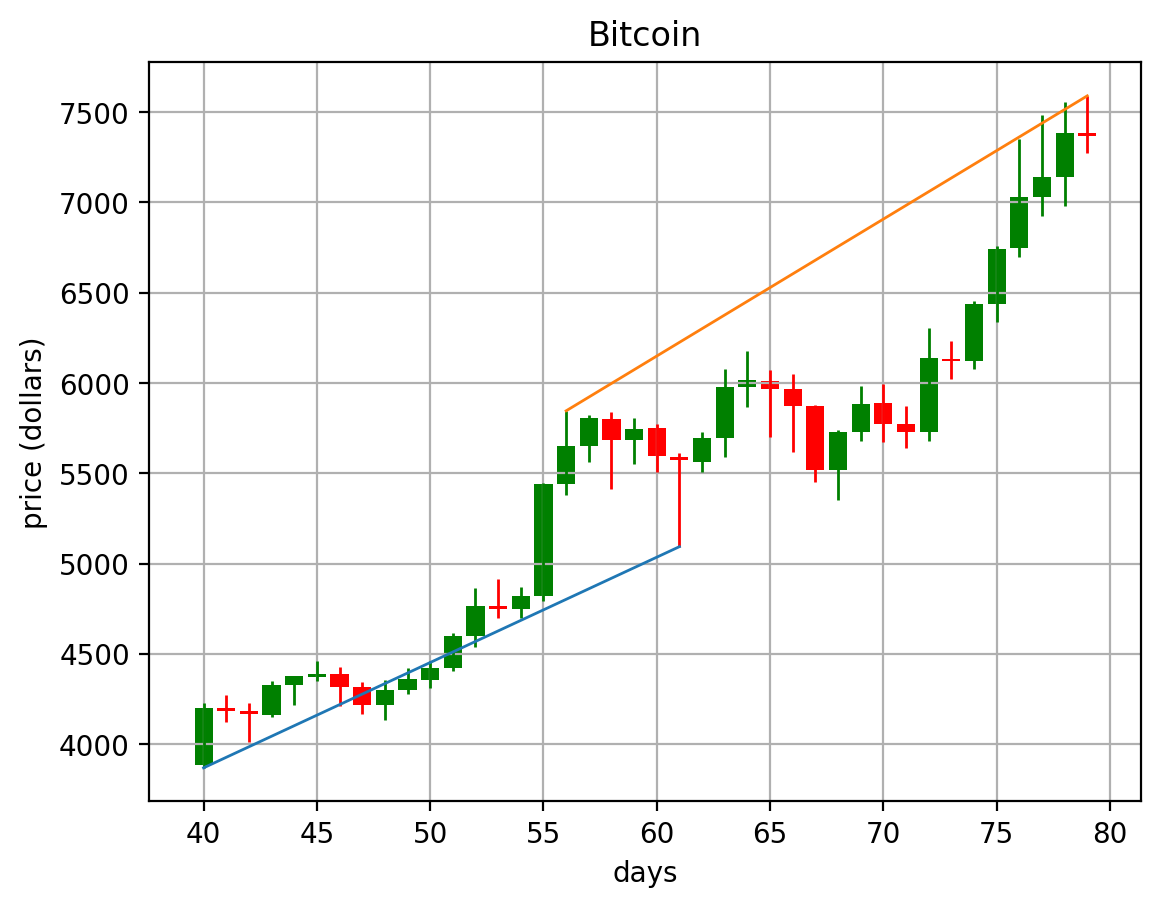

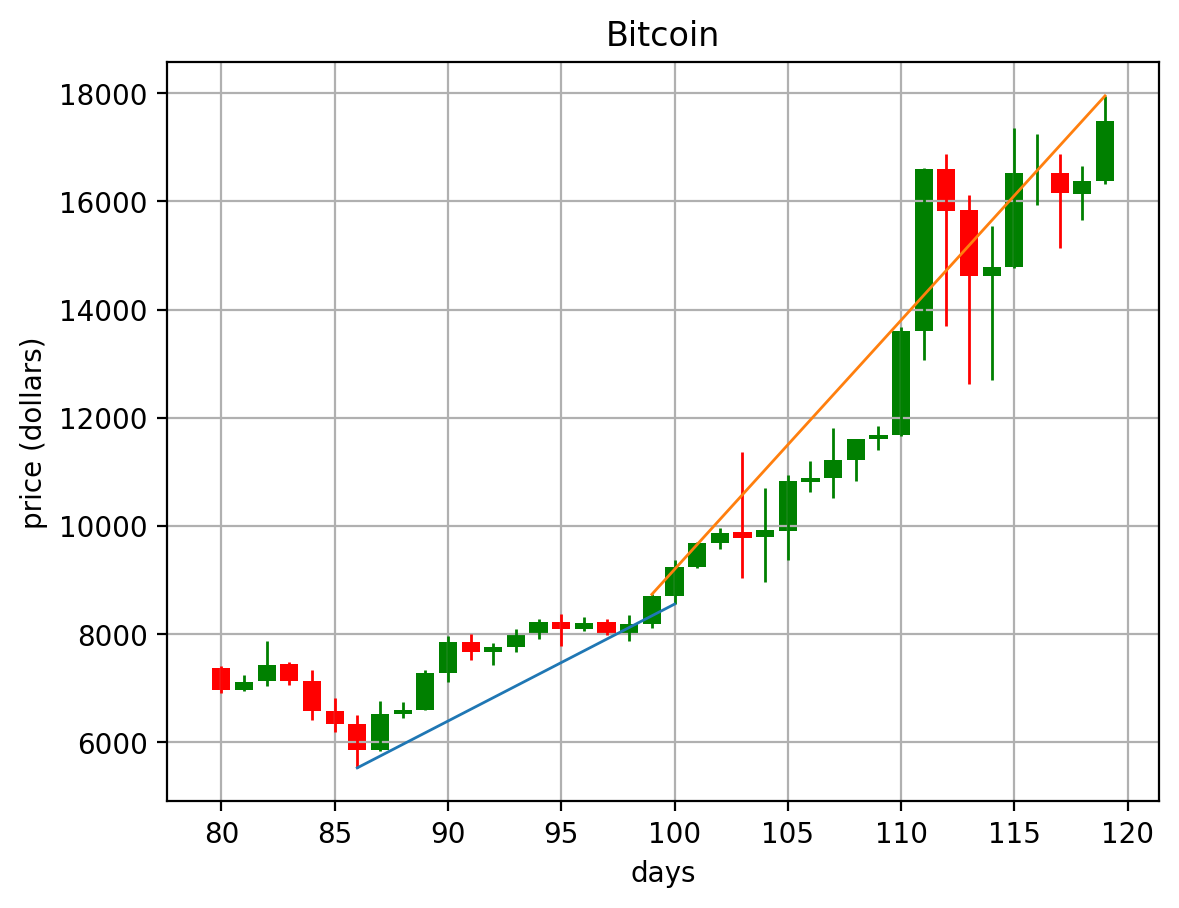

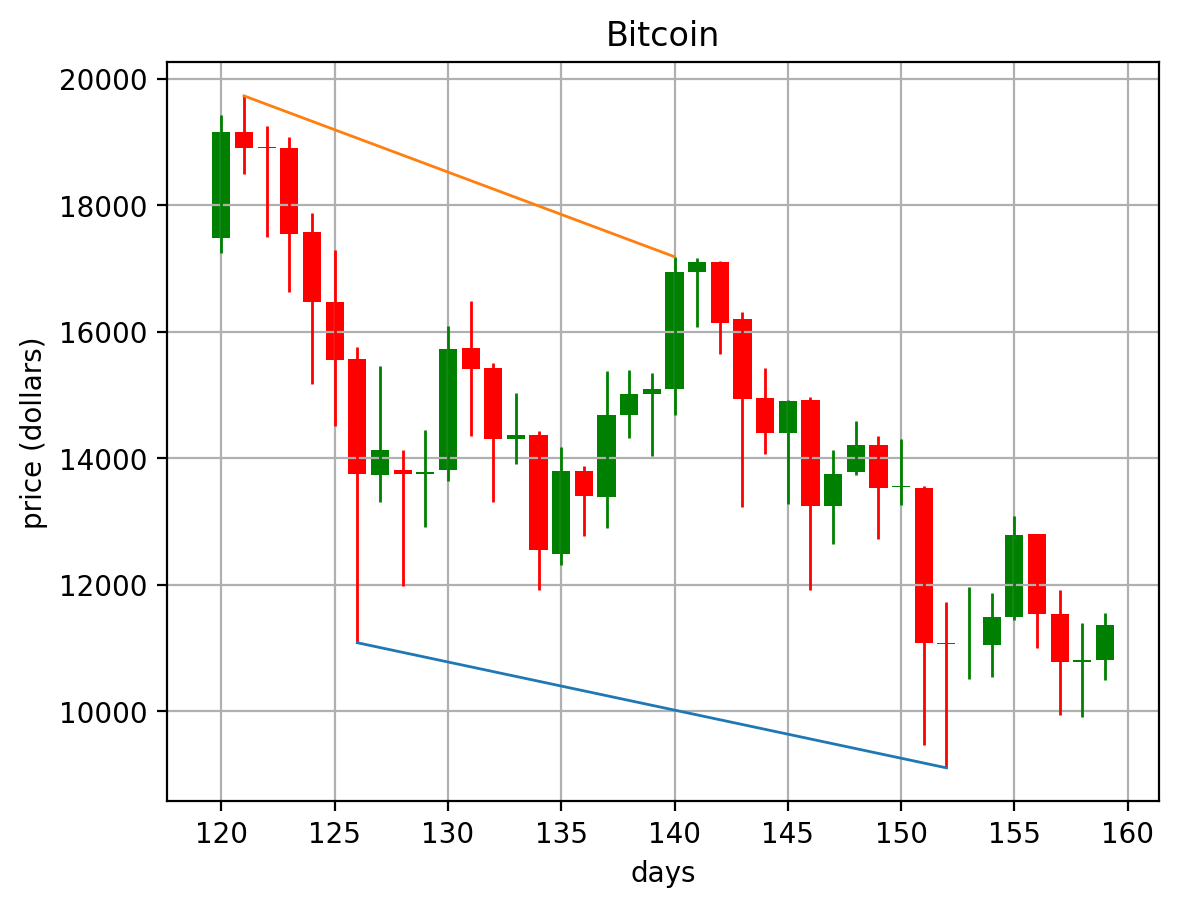

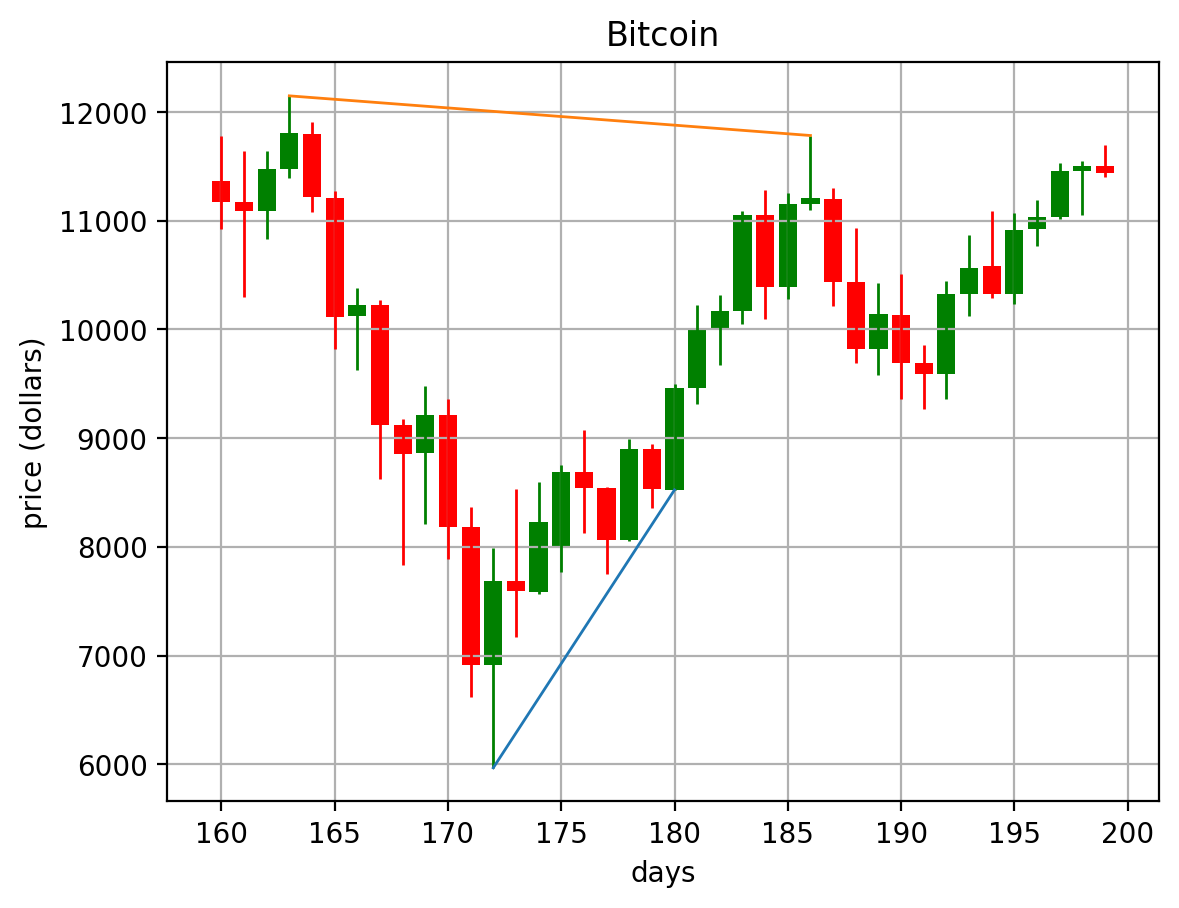

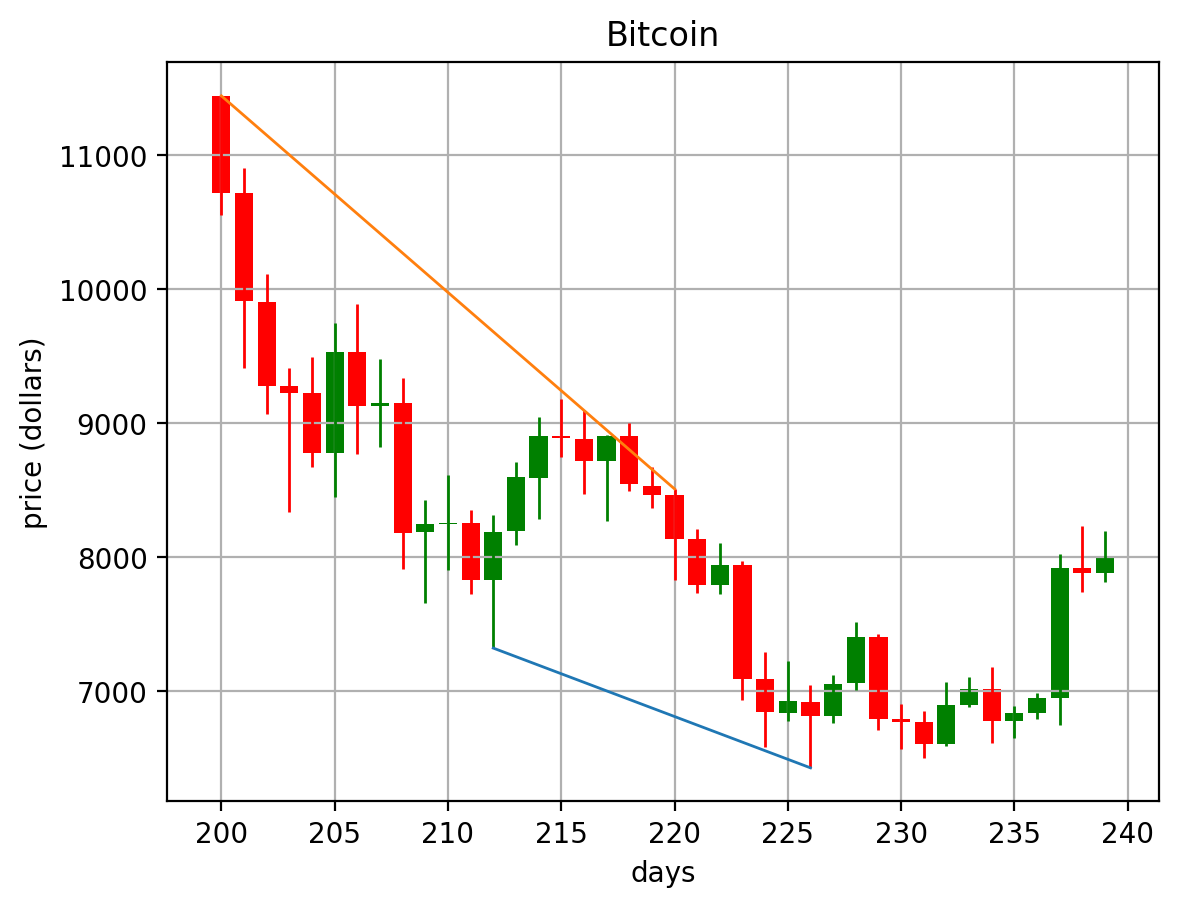

In [46]:
for x in range(40,220,40) :
    candleplot(df, list_of_draw_low_20, list_of_draw_high_20, list_of_interval_20, x_min = x , x_max = x + 40, filename= f"test_{x}-{x + 40}-0")


In [36]:
list_of_draw_low_40, list_of_draw_high_40, list_of_interval_40 = draw_list_creation(time_step=40, forecast_threshold=0)

print(list_of_interval_40)
print(list_of_draw_low_40)
print(list_of_draw_high_40)

[(0, 80), (40, 120), (80, 160), (120, 200), (160, 240), (200, 280), (240, 320), (280, 360), (320, 400), (360, 440), (400, 480), (440, 520), (480, 560), (520, 600), (560, 640), (600, 680), (640, 720), (680, 760), (720, 800), (760, 840), (800, 880), (840, 920), (880, 960), (920, 1000), (960, 1040), (1000, 1080), (1040, 1120), (1080, 1160), (1120, 1200), (1160, 1240), (1200, 1280), (1240, 1320), (1280, 1360), (1320, 1400), (1360, 1440), (1400, 1480), (1440, 1520), (1480, 1560), (1520, 1600), (1560, 1640), (1600, 1680), (1640, 1720), (1680, 1760), (1720, 1800), (1760, 1840), (1800, 1880), (1840, 1920), (1880, 1960), (1920, 2000), (1960, 2040), (2000, 2080), (2040, 2120), (2080, 2160), (2120, 2200), (2160, 2240), (2200, 2280), (2240, 2320), (2280, 2360)]
[((28, 2967.1071129739234), (40, 3870.112401892901)), ((40, 3870.112401892901), (86, 5528.460702706398)), ((86, 5528.460702706398), (152, 9104.895361998002)), ((152, 9104.895361998002), (172, 5967.137642803926)), ((172, 5967.137642803926), 

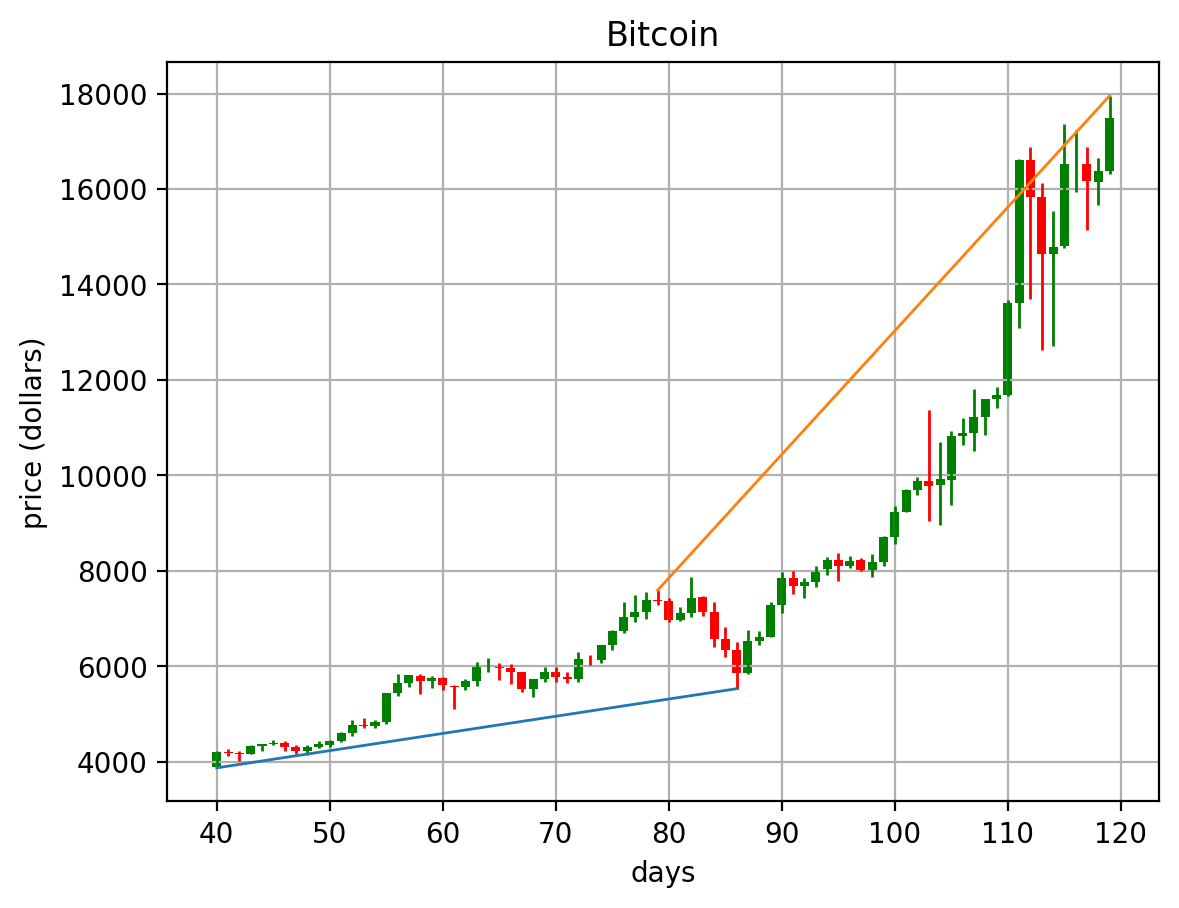

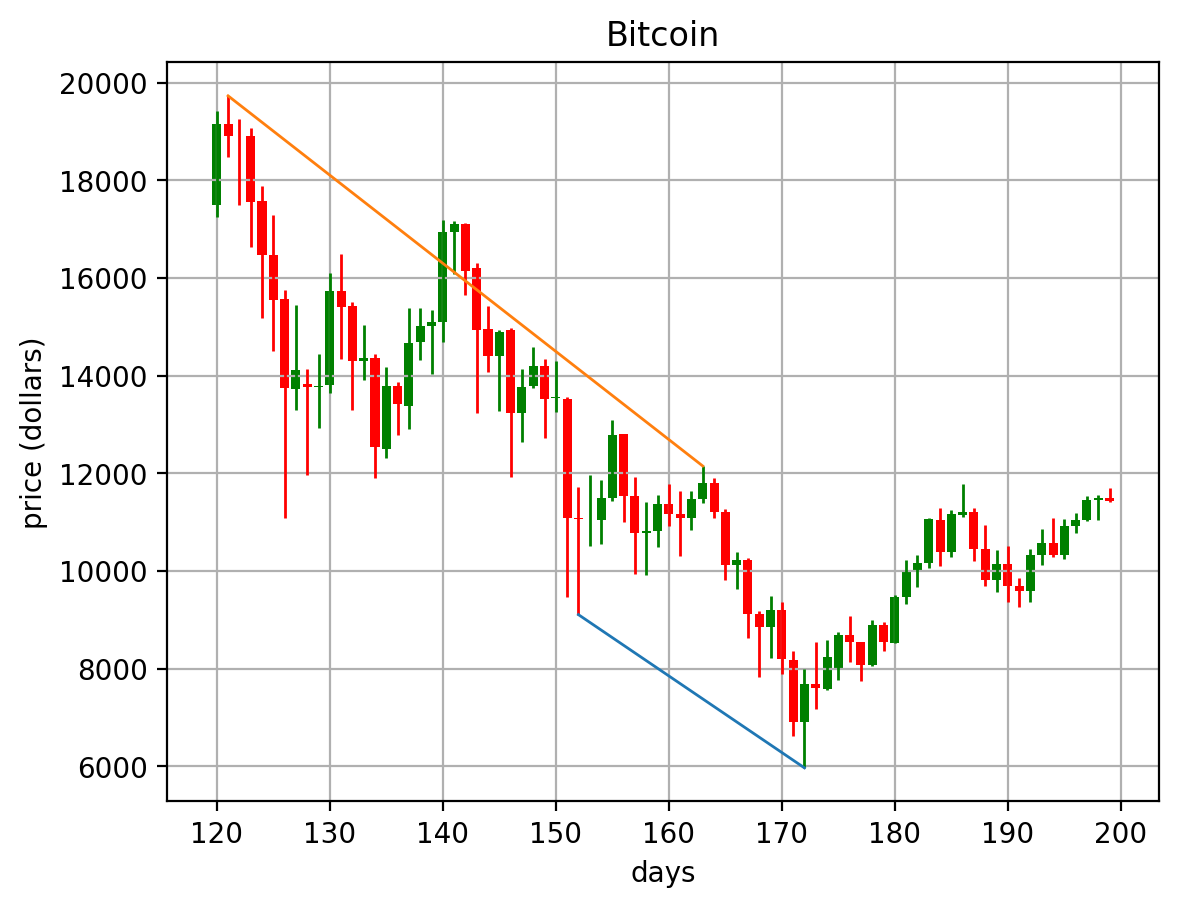

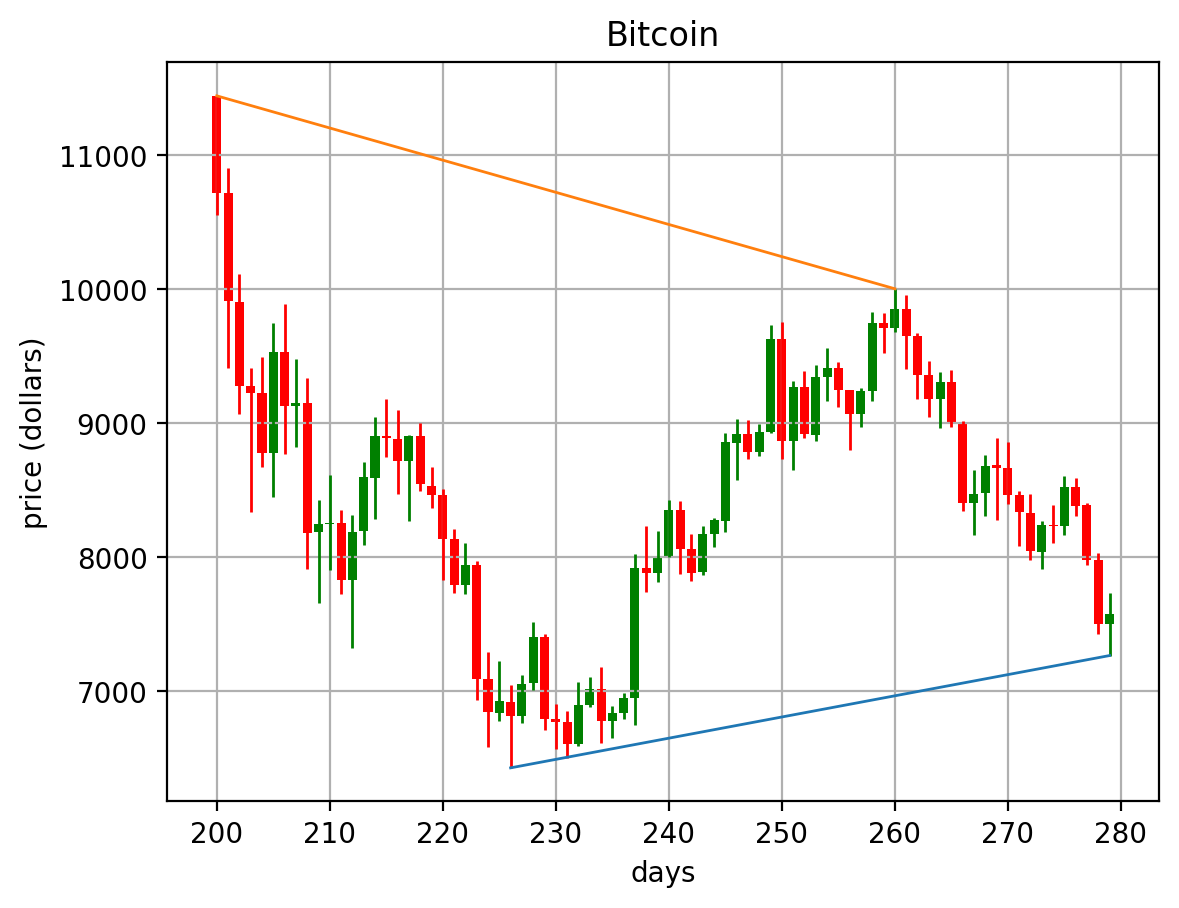

In [47]:
for x in range(40,220,80) :
    candleplot(df, list_of_draw_low_40, list_of_draw_high_40, list_of_interval_40, x_min = x , x_max = x + 80, filename= f"test_{x}-{x + 80}-0")


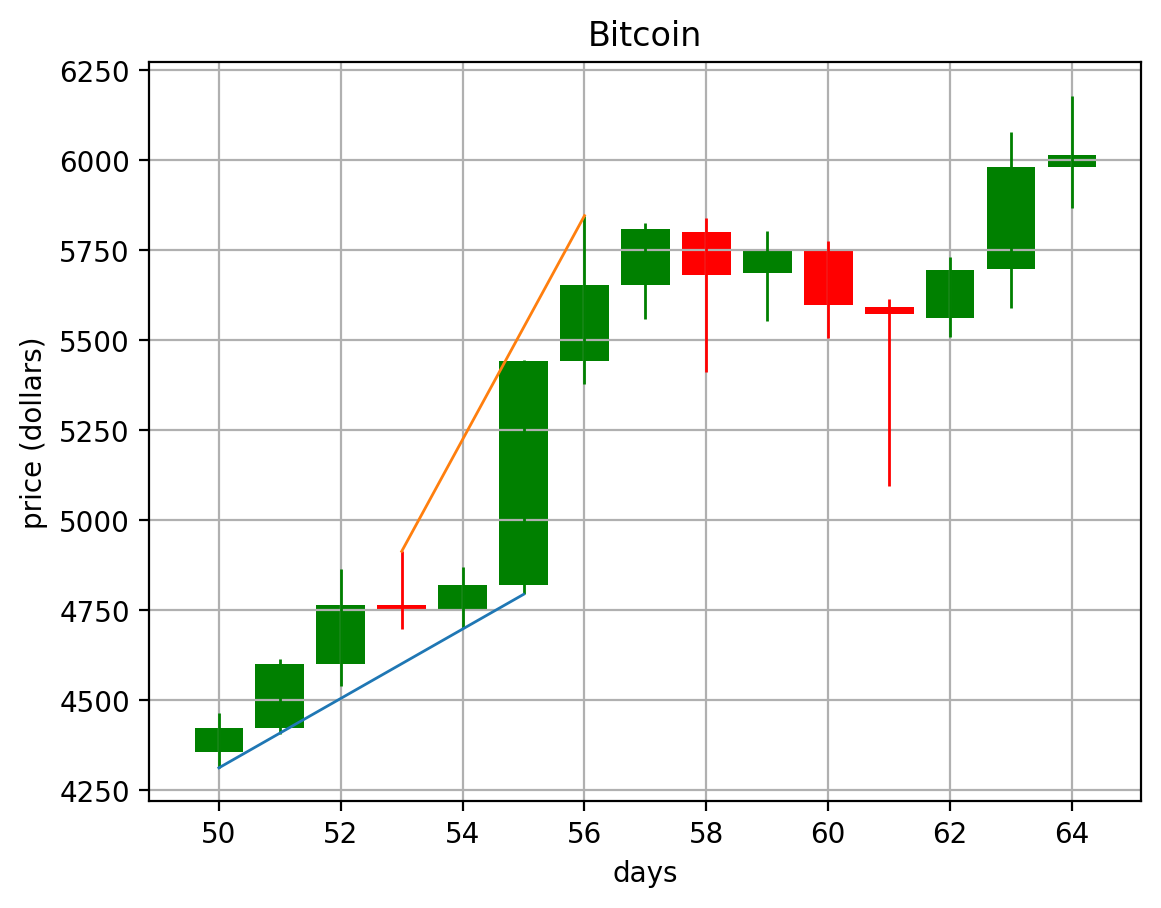

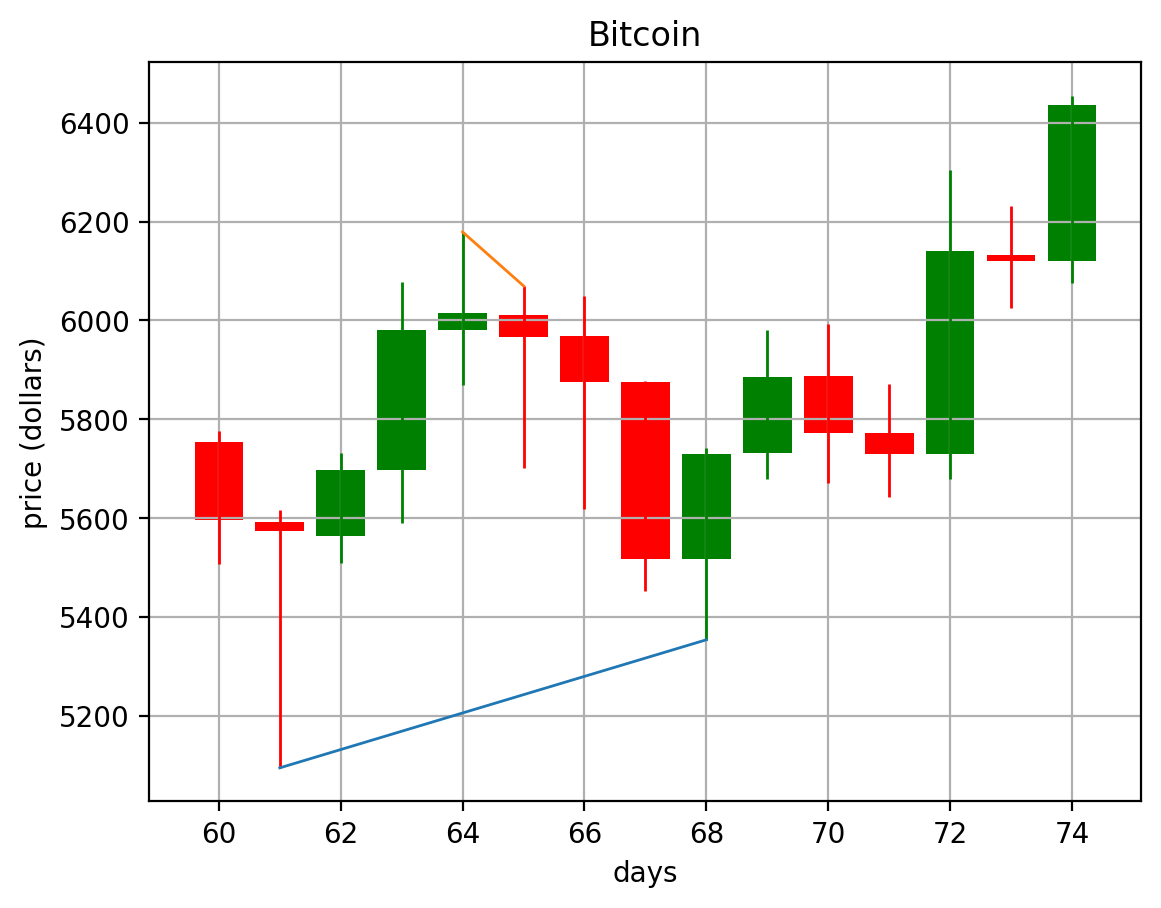

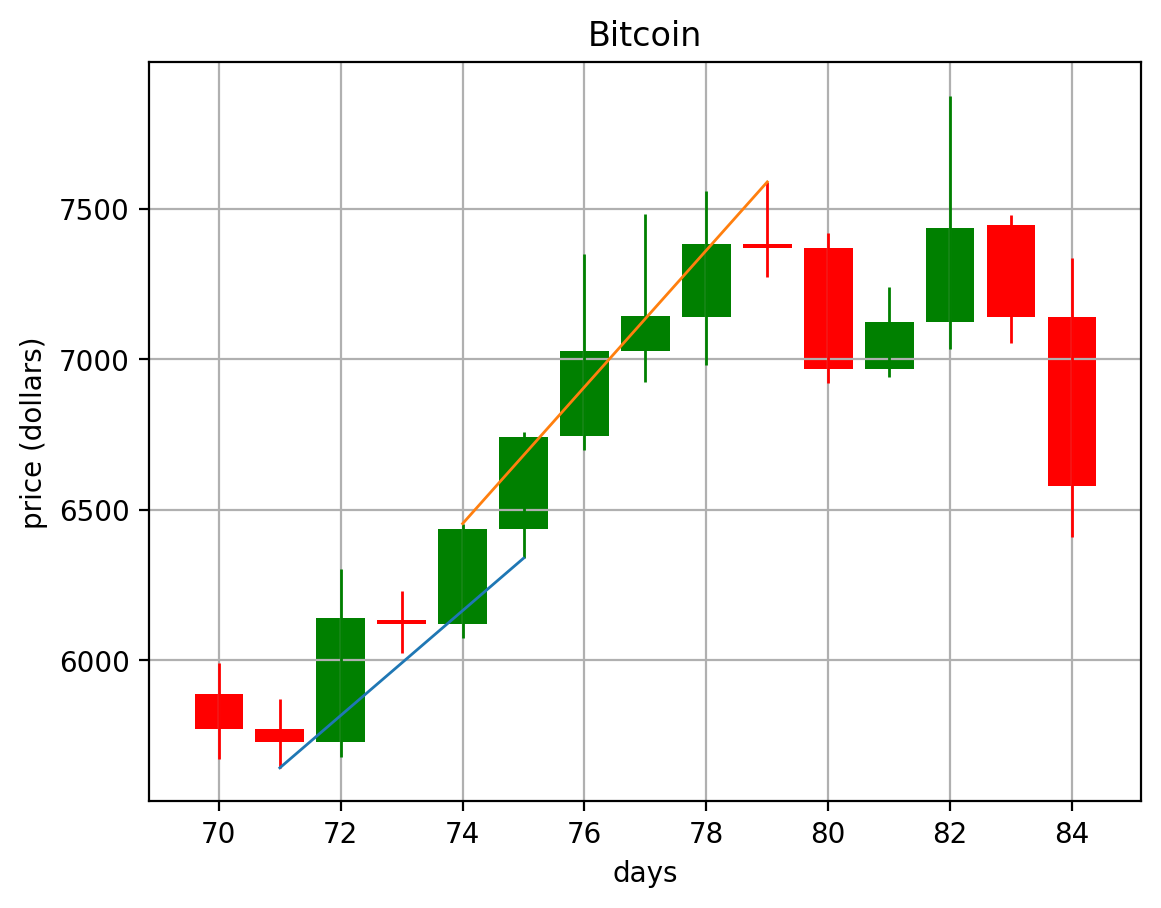

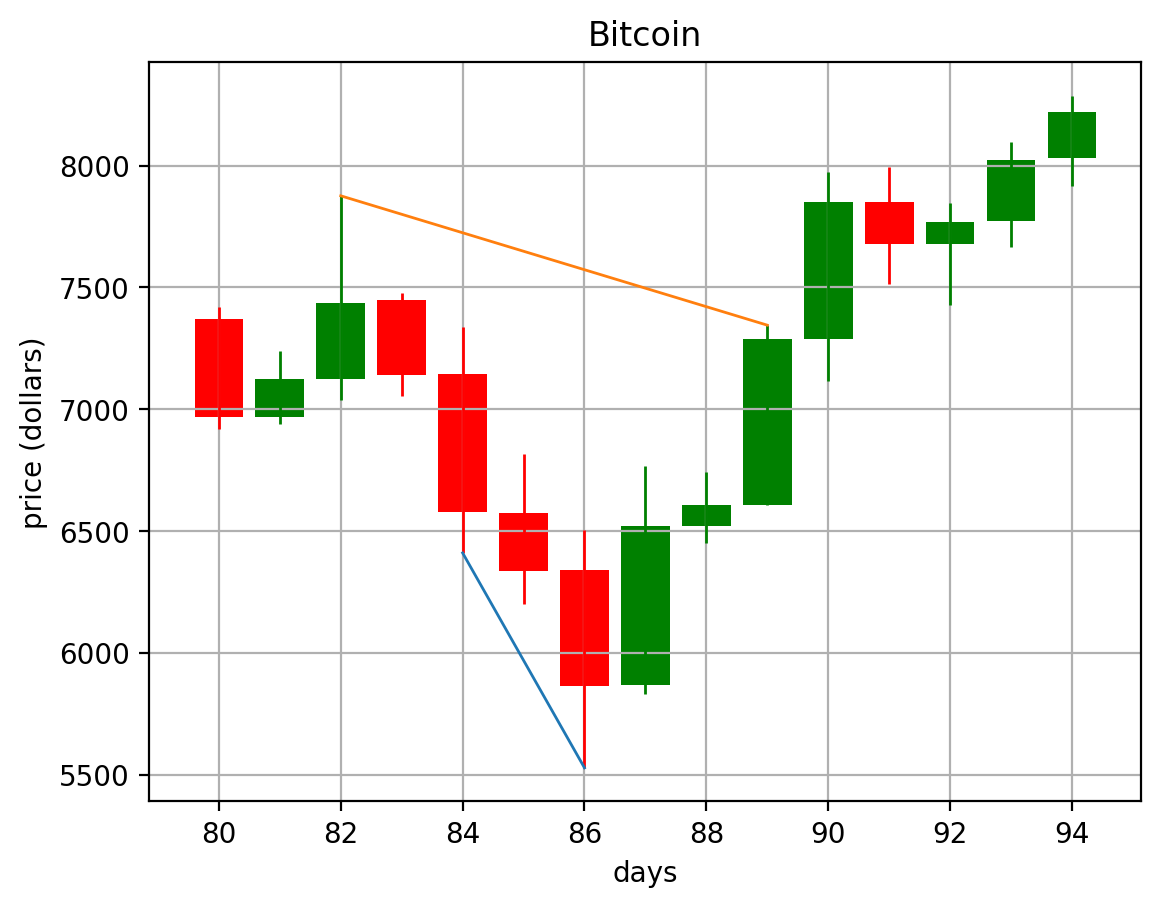

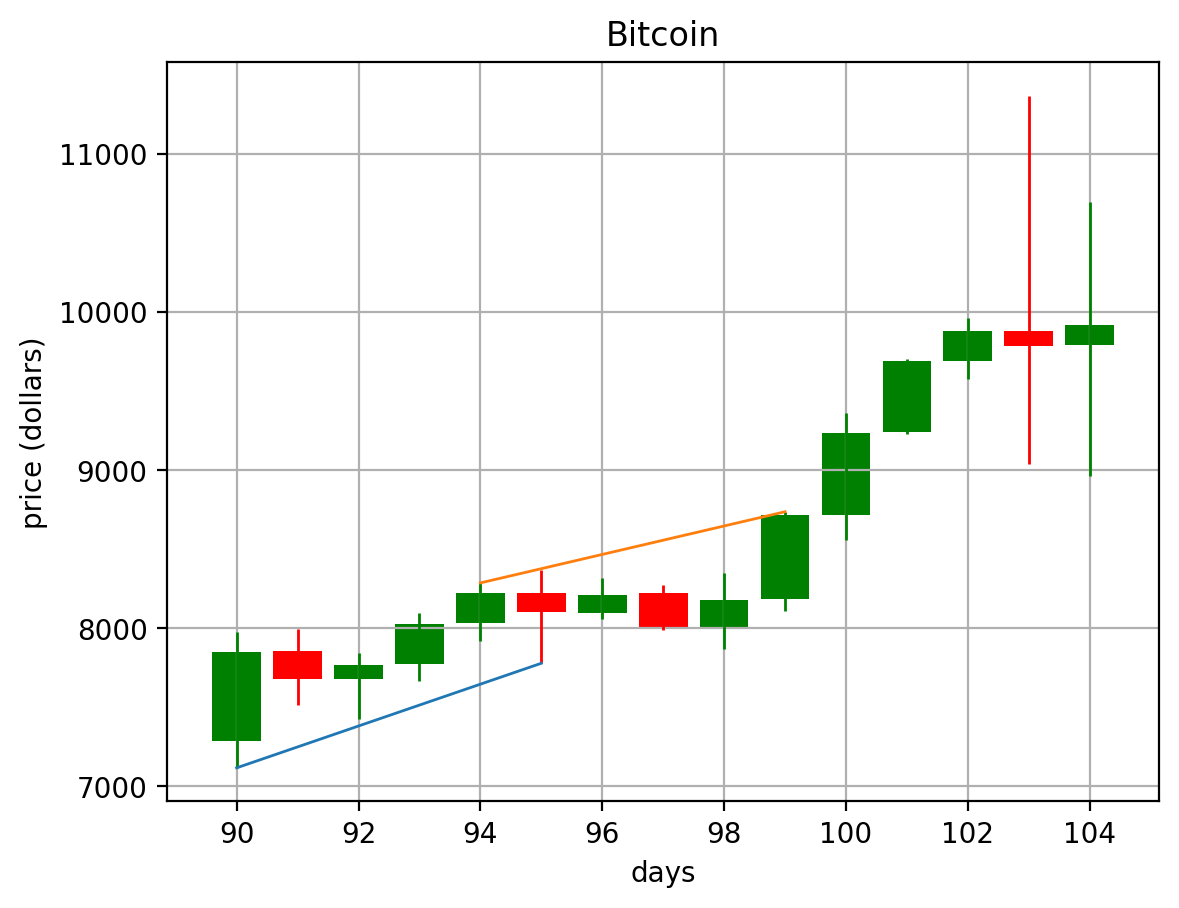

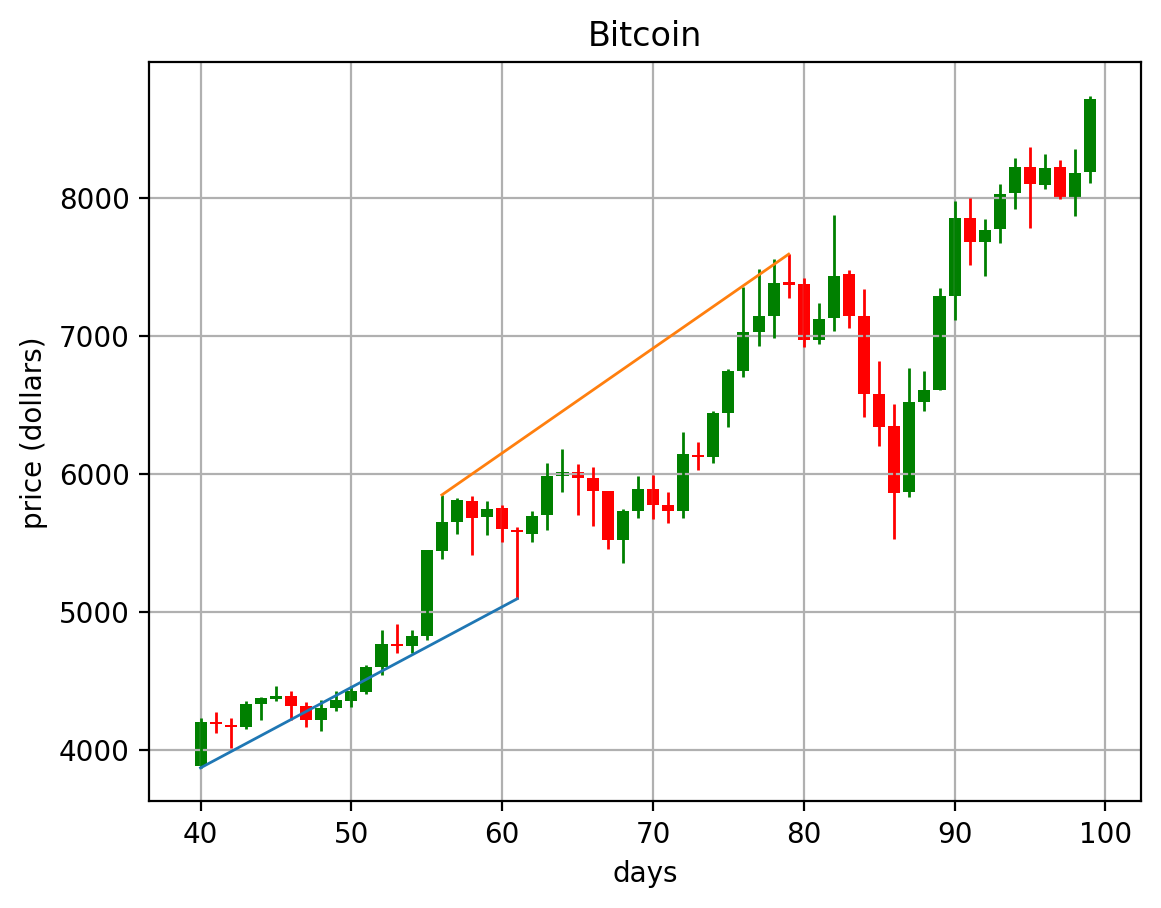

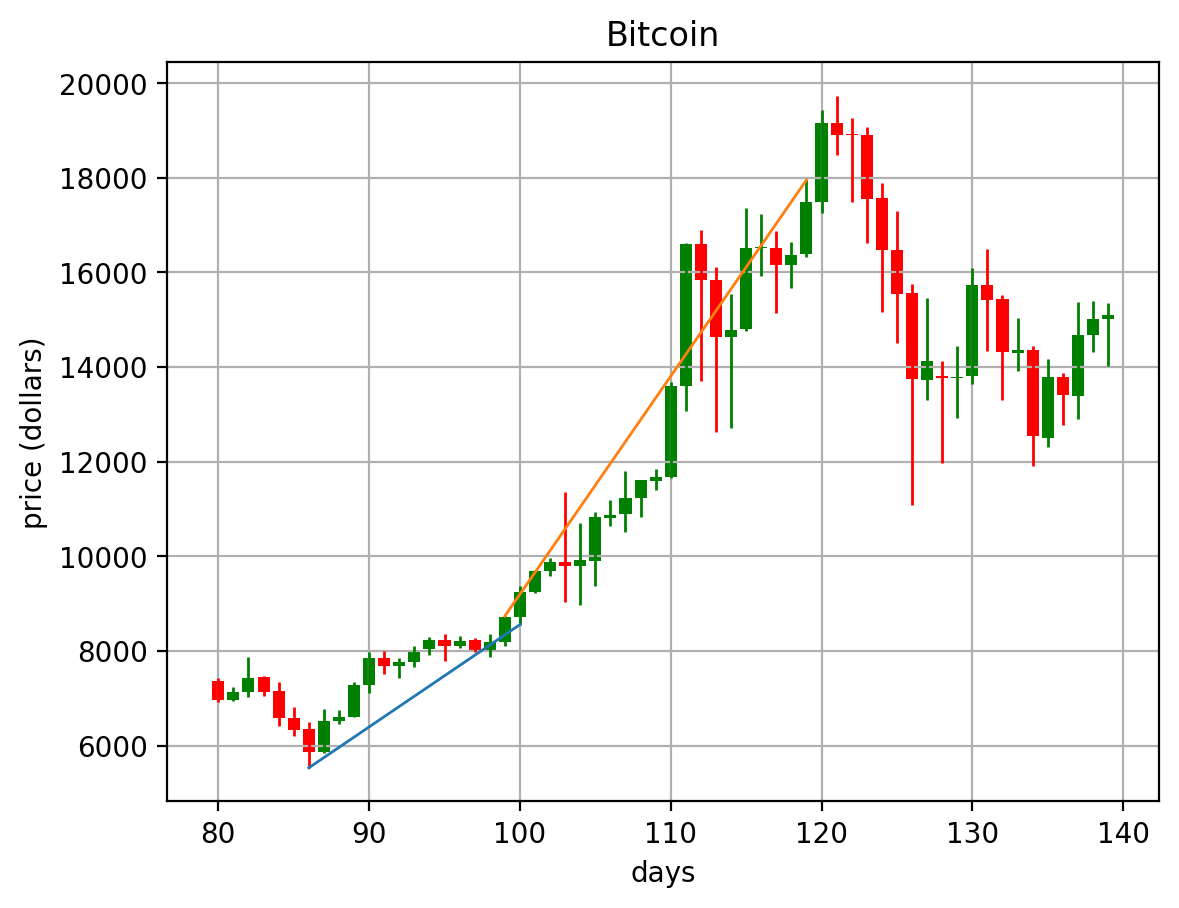

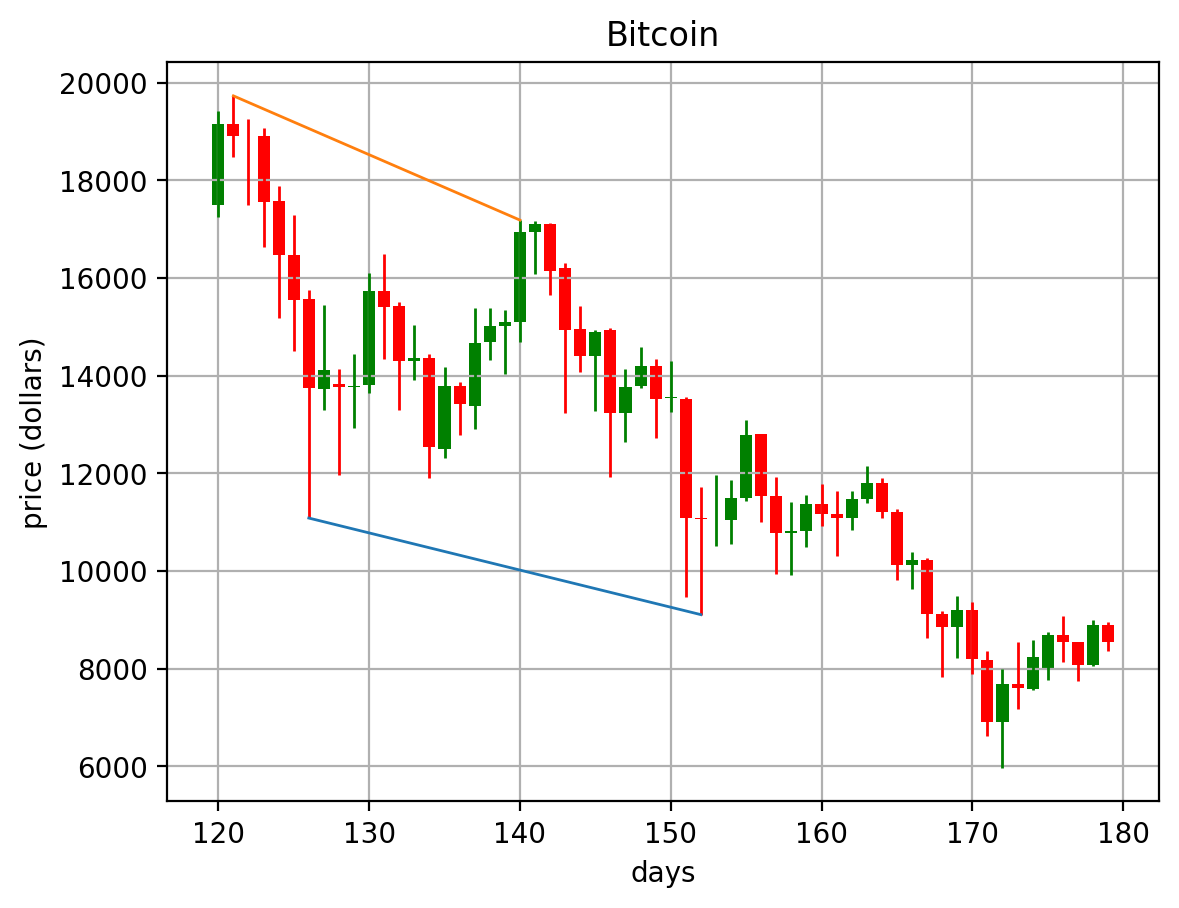

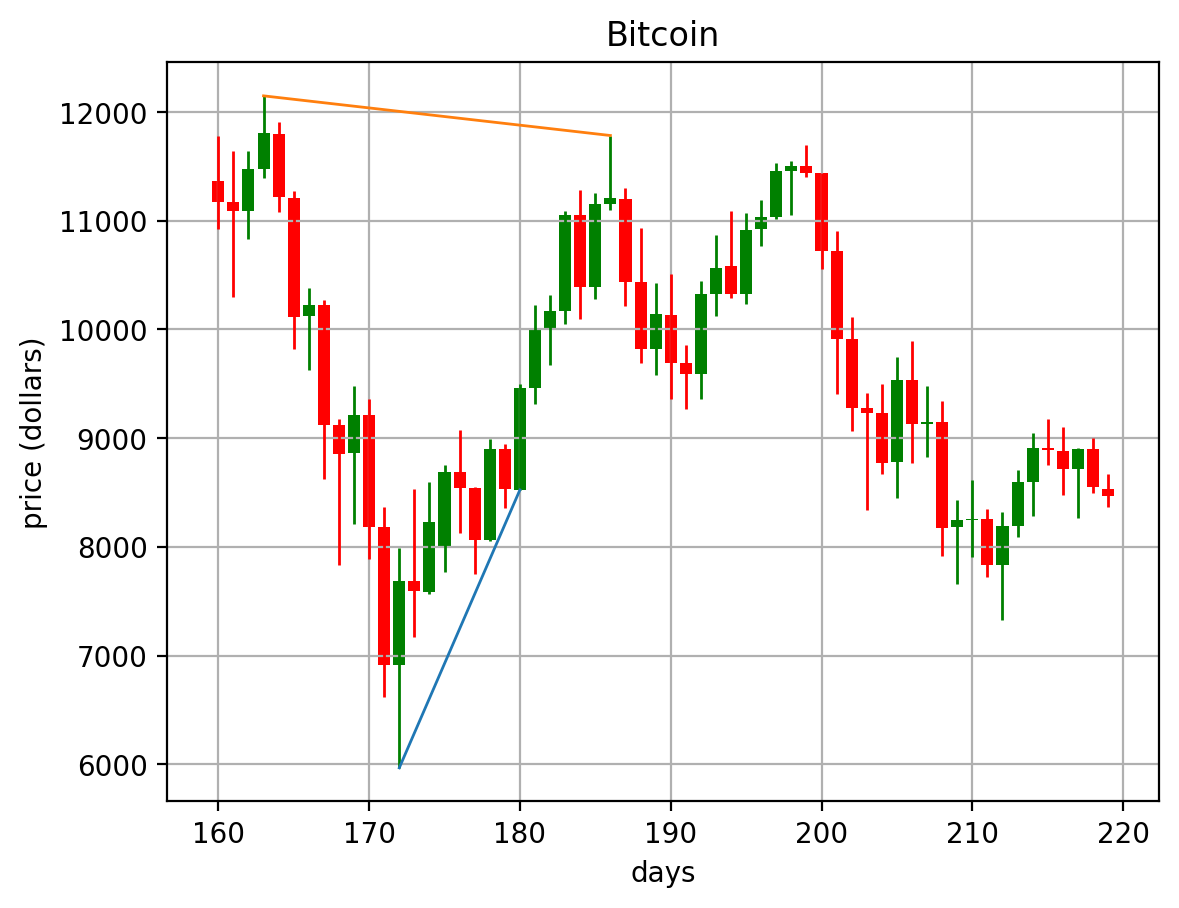

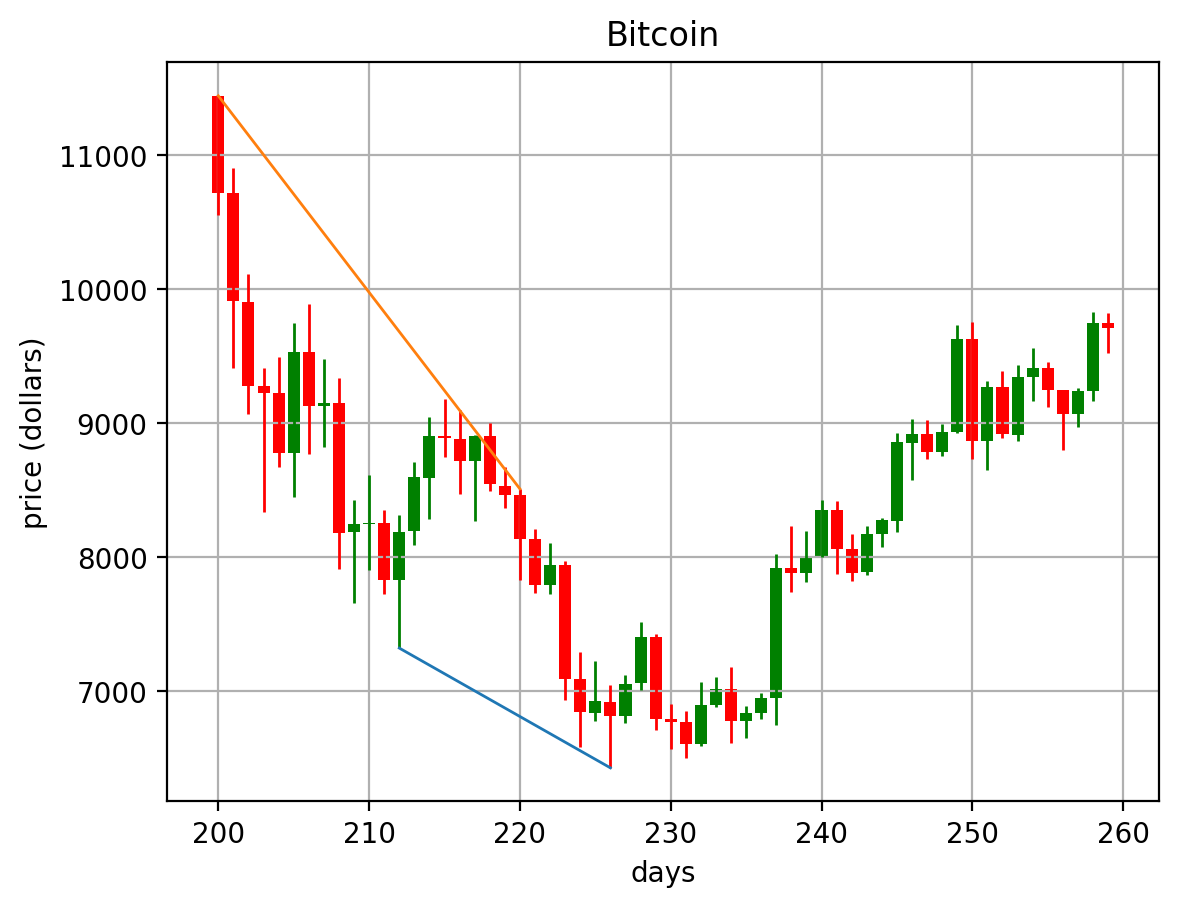

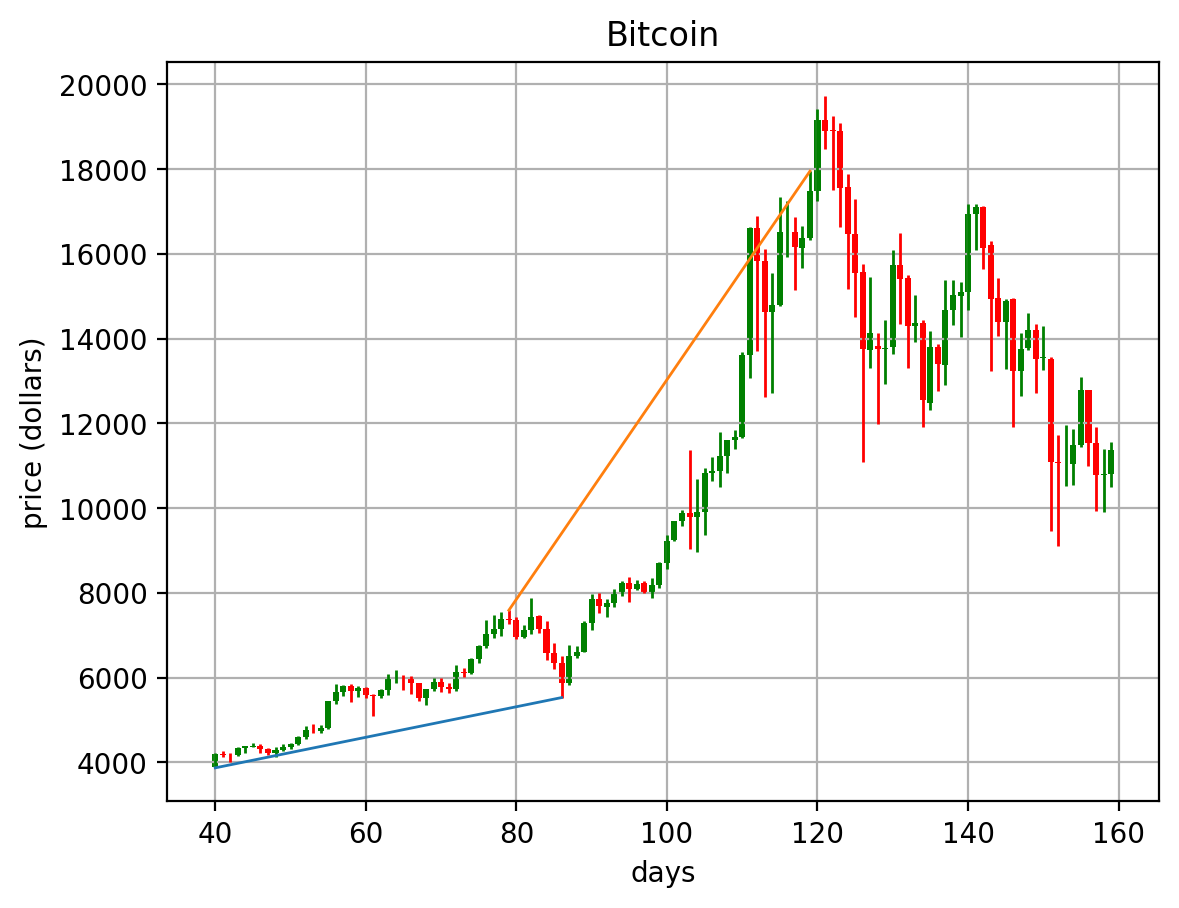

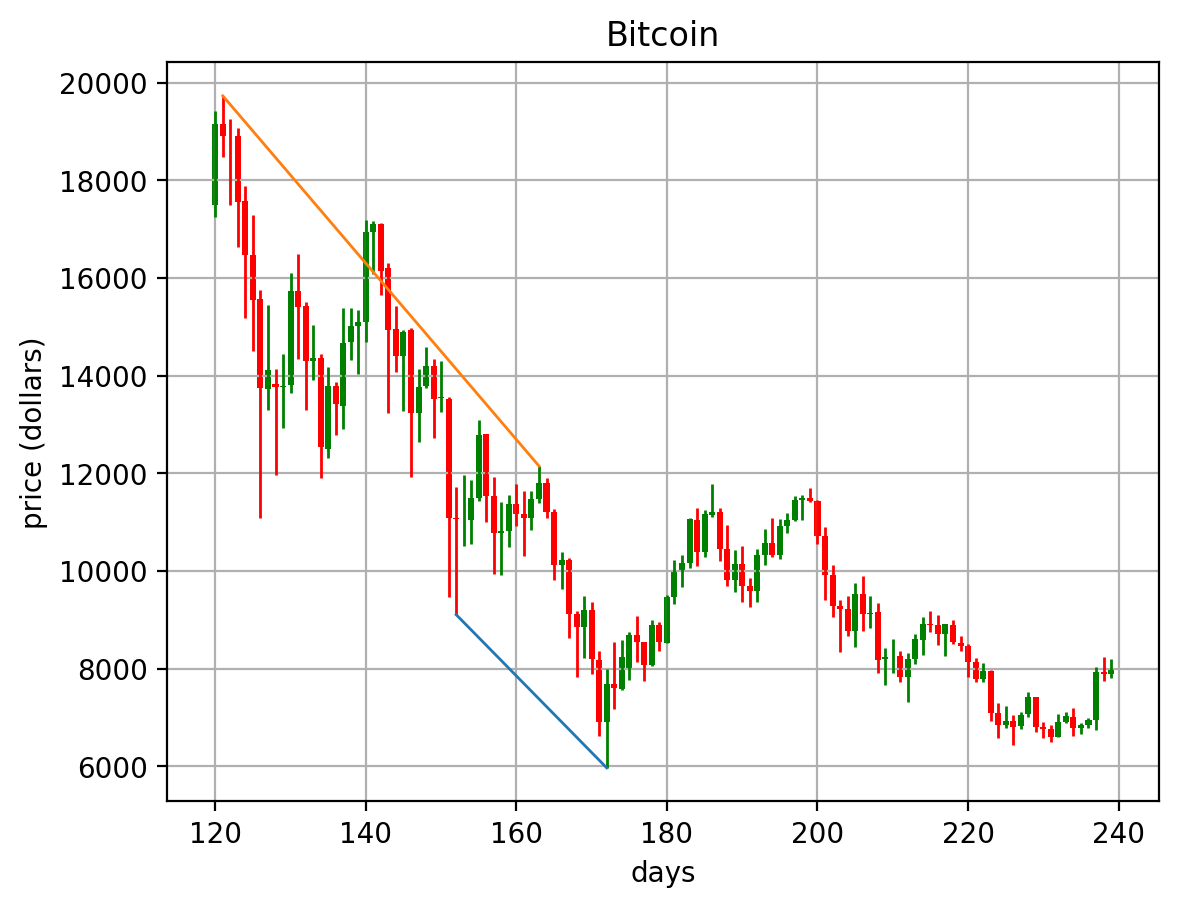

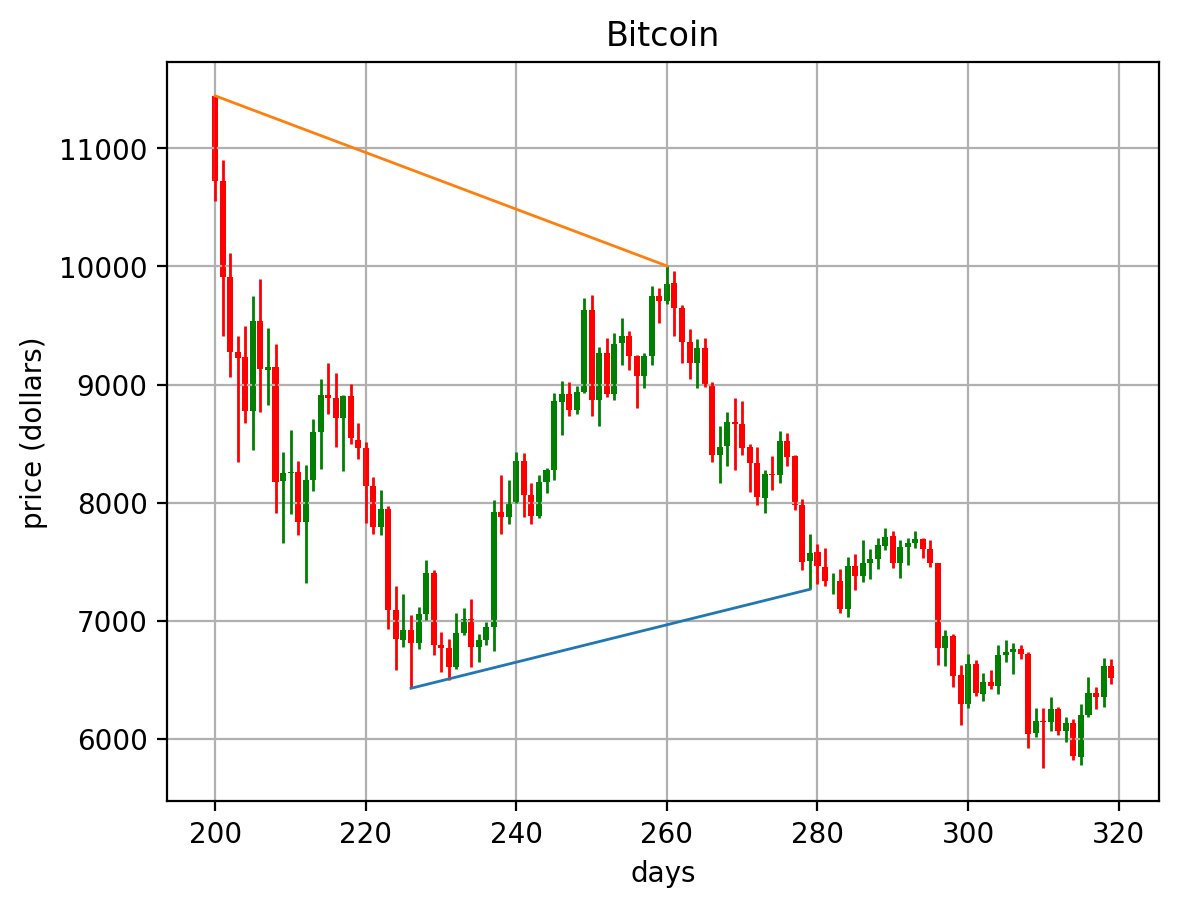

In [48]:
candleplot(df, list_of_draw_low_5, list_of_draw_high_5, list_of_interval_5, x_min = 50 , x_max = 65, filename= "test_50-60-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 60 , x_max = 75, filename= "test_60-70-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 70 , x_max = 85, filename= "test_70-80-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 80 , x_max = 95, filename= "test_80-90-5")
candleplot(df, list_of_draw_low_5, list_of_draw_high_5,list_of_interval_5, x_min = 90 , x_max = 105, filename= "test_90-100-5")

for x in range(40,220,40) :
    candleplot(df, list_of_draw_low_20, list_of_draw_high_20, list_of_interval_20, x_min = x , x_max = x + 60, filename= f"test_{x}-{x + 40}-20")

for x in range(40,220,80) :
    candleplot(df, list_of_draw_low_40, list_of_draw_high_40, list_of_interval_40, x_min = x , x_max = x + 120, filename= f"test_{x}-{x + 80}-40")

